In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
datas = pd.read_csv('player(수정3차).csv', encoding= 'cp949')

In [23]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      37 non-null     float64
 1   IP        37 non-null     float64
 2   ERA       37 non-null     float64
 3   K         37 non-null     float64
 4   OOPS      37 non-null     float64
 5   wage_cat  37 non-null     object 
 6   K/9       37 non-null     object 
dtypes: float64(5), object(2)
memory usage: 2.1+ KB


In [4]:
datas.describe()

,wage,IP,ERA,K,OOPS
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,1.811892,131.127027,4.982703,6.542973,0.783378
std,0.919972,17.179472,1.025076,1.124240,0.078145
min,0.600000,101.100000,3.510000,4.530000,0.662000
25%,1.000000,118.100000,4.180000,5.540000,0.717000
50%,1.650000,133.000000,4.870000,6.710000,0.773000
75%,2.450000,145.100000,5.350000,7.470000,0.830000
max,3.900000,169.000000,7.540000,8.480000,0.979000


In [5]:
corr = datas.corr()
corr

,wage,IP,ERA,K,OOPS
wage,1.000000,0.583502,-0.449429,0.120737,-0.366136
IP,0.583502,1.000000,-0.405599,0.465327,-0.326310
ERA,-0.449429,-0.405599,1.000000,-0.312964,0.834938
K,0.120737,0.465327,-0.312964,1.000000,-0.361149
OOPS,-0.366136,-0.326310,0.834938,-0.361149,1.000000


<AxesSubplot:>

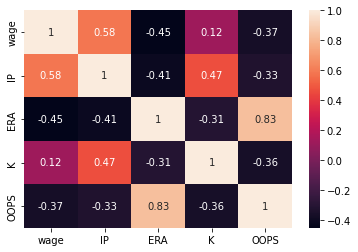

In [6]:
sns.heatmap(corr, annot=True)

In [7]:
def wage_analyzer(money):
    cat = ''
    if money <= 1:cat = 'low'
    elif money <= 2: cat = 'med'
    else: cat = 'high'
        
    return cat

In [8]:
datas['wage_cat'] = datas['wage'].apply(lambda x : wage_analyzer(x))

<AxesSubplot:xlabel='wage_cat', ylabel='IP'>

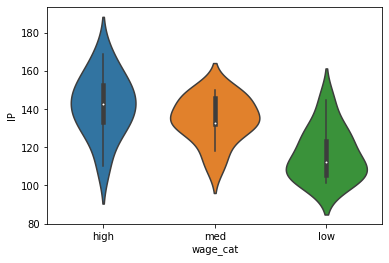

In [9]:
sns.violinplot(x='wage_cat', y='IP', data=datas)

In [10]:
def strikeout_analyzer(strike):
    sk = ''
    if 4<= strike <5 : sk = 'low'
    elif 5 <= strike < 7: sk ='med'
    else: sk ='high'
        
    return sk
    

In [11]:
datas['K/9'] = datas['K'].apply(lambda x : strikeout_analyzer(x))

<AxesSubplot:xlabel='K/9', ylabel='IP'>

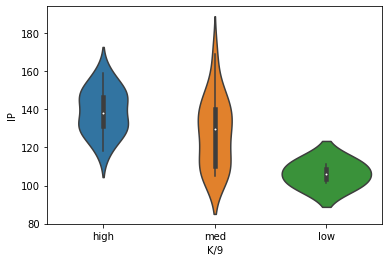

In [12]:
sns.violinplot(x='K/9', y='IP', data=datas)

In [13]:
import sklearn
print(sklearn.__version__)

0.24.2


In [14]:
datas['wage_cat'].value_counts()

med     13
high    12
low     12
Name: wage_cat, dtype: int64

In [15]:
from sklearn.cluster import KMeans

In [18]:
data = datas.drop(['wage_cat', 'K/9'], axis =1 )
data.head()

,wage,IP,ERA,K,OOPS
0,3.20,154.1,4.37,7.81,0.704
1,2.20,147.2,4.08,8.41,0.719
2,1.65,147.1,4.70,6.60,0.806
3,1.60,146.0,3.58,7.58,0.662
4,1.30,140.0,4.89,5.01,0.809


In [32]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(data)

KMeans(n_clusters=4, random_state=0)

In [33]:
data['cluster'] = kmeans.labels_
data.head()

,wage,IP,ERA,K,OOPS,cluster,pca_x,pca_y,silhouette_coeff
0,3.20,154.1,4.37,7.81,0.704,0,23.059326,-0.214894,0.649490
1,2.20,147.2,4.08,8.41,0.719,3,16.163624,-1.010164,0.619430
2,1.65,147.1,4.70,6.60,0.806,3,15.976207,0.619896,0.623285
3,1.60,146.0,3.58,7.58,0.662,3,14.933548,-0.801497,0.570004
4,1.30,140.0,4.89,5.01,0.809,3,8.779298,0.916264,0.067153


In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data)

data['pca_x'] = pca_transformed[:,0]
data['pca_y'] = pca_transformed[:,1]
data.head()

,wage,IP,ERA,K,OOPS,cluster,pca_x,pca_y,silhouette_coeff
0,3.20,154.1,4.37,7.81,0.704,0,32.598258,-0.811220,0.649490
1,2.20,147.2,4.08,8.41,0.719,3,22.844455,-1.405580,0.619430
2,1.65,147.1,4.70,6.60,0.806,3,22.579342,0.943786,0.623285
3,1.60,146.0,3.58,7.58,0.662,3,21.104795,-1.096759,0.570004
4,1.30,140.0,4.89,5.01,0.809,3,12.432359,1.862502,0.067153


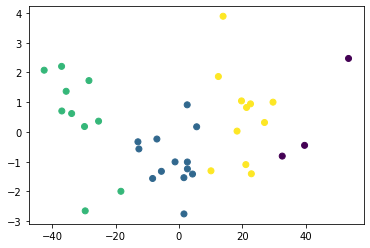

In [35]:
plt.scatter(x=data.loc[:, 'pca_x'], y=data.loc[:, 'pca_y'], c=data['cluster']) 

In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [37]:
score_samples = silhouette_samples(data, data['cluster'])

data['silhouette_coeff'] = score_samples

In [38]:
data.head()

,wage,IP,ERA,K,OOPS,cluster,pca_x,pca_y,silhouette_coeff
0,3.20,154.1,4.37,7.81,0.704,0,32.598258,-0.811220,-0.066959
1,2.20,147.2,4.08,8.41,0.719,3,22.844455,-1.405580,0.674779
2,1.65,147.1,4.70,6.60,0.806,3,22.579342,0.943786,0.698009
3,1.60,146.0,3.58,7.58,0.662,3,21.104795,-1.096759,0.723115
4,1.30,140.0,4.89,5.01,0.809,3,12.432359,1.862502,0.374874


<AxesSubplot:>

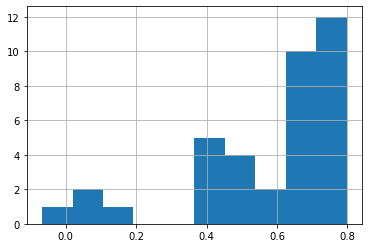

In [39]:
data['silhouette_coeff'].hist()

In [40]:
data.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.292490
1    0.588829
2    0.675066
3    0.523496
Name: silhouette_coeff, dtype: float64